In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Aim:** The assignment aims to investigate the relationships between an antenna's design parameters and its electromagnetic performance through machine learning techniques. The objective is to utilize dimensionality reduction and predictive modeling methods.

# Dimensionality Reduction with PCA

In [2]:
# Load the dataset

df = pd.read_csv("hw1_files/hw1_input.csv")
df

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
0,3.202024,2.288742,0.012514,0.139247,0.041757,0.028566,0.000549,0.032403,0.348140,3.735926,4.278575
1,2.107848,2.895504,0.037171,0.149492,0.056775,0.028930,0.005536,0.053647,0.326369,4.929862,4.876068
2,3.252113,4.818411,0.025432,0.578834,0.029972,0.030922,0.020274,0.049845,0.446639,4.772670,4.745106
3,4.161509,2.294309,0.011058,0.117266,0.093223,0.017604,0.001135,0.098610,0.055665,4.102438,3.755671
4,4.820912,2.948325,0.019658,0.163503,0.094337,0.025757,0.021725,0.072813,0.272282,2.531031,3.047553
...,...,...,...,...,...,...,...,...,...,...,...
380,3.950131,5.165856,0.034389,0.770787,0.095579,0.025591,0.011430,0.048502,0.241219,4.099788,4.635040
381,2.676373,2.826965,0.011377,0.106795,0.055925,0.042376,0.005102,0.060532,0.294000,4.758303,4.205687
382,4.406785,1.814310,0.011187,0.146086,0.049041,0.040626,0.022849,0.033737,0.225794,2.826602,4.908306
383,2.540721,3.310983,0.015000,0.135650,0.082388,0.043490,0.011130,0.033451,0.370502,3.303852,4.764701


In [3]:
# Data is standardized before performing the PCA

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [4]:
# Perform Principal Component Analysis
# A rule-based approach is applied: the number of principal components is determined when the total explained variance exceeds 65%

for i in range(len(df.columns)):
    pca = PCA(n_components=i)
    df_std_pca = pca.fit_transform(df_std)
    if sum(pca.explained_variance_ratio_) > 0.5:
        break
    else:
        continue

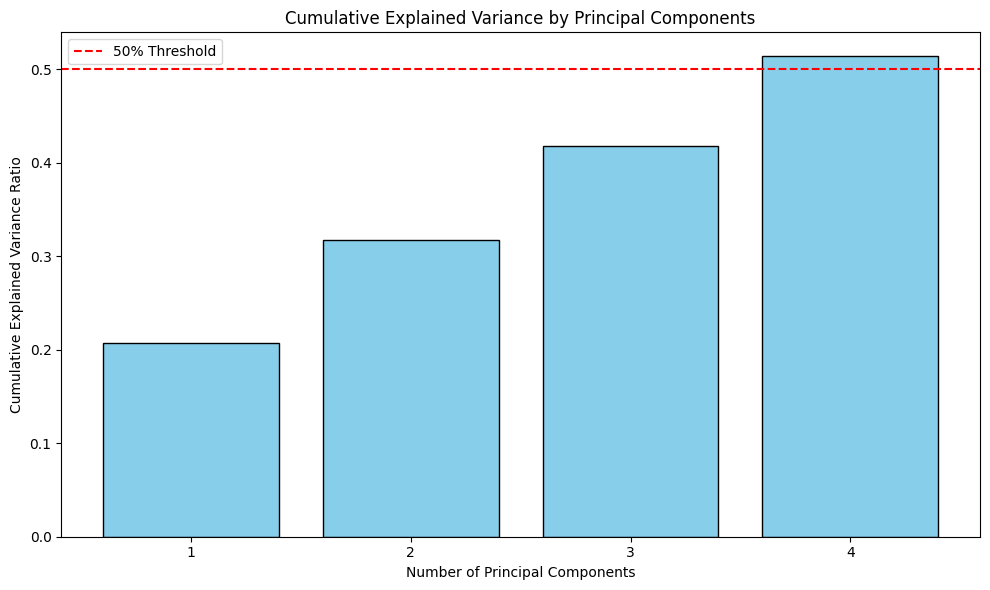

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance as a bar plot
plt.figure(figsize=(10, 6))
components = np.arange(1, len(cumulative_explained_variance) + 1)
plt.bar(components, cumulative_explained_variance, color='skyblue', edgecolor='k')
plt.axhline(y=0.5, color='r', linestyle='--', label=f'{int(0.5*100)}% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(components)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
print("Percentage of the total variance explained by the principle components: ", sum(pca.explained_variance_ratio_))
print("Number of principle components: ", pca.n_components)

Percentage of the total variance explained by the principle components:  0.5139679387066479
Number of principle components:  4


In [7]:
df_std_pca = pd.DataFrame(df_std_pca)
df_std_pca

,0,1,2,3
0,-0.982602,-1.004385,-1.516279,-2.104630
1,0.248740,0.141891,0.376193,-0.732142
2,1.908395,-0.083787,-0.319515,-1.120700
3,-1.213149,1.144310,-2.298673,1.459123
4,-1.651363,-0.449599,-0.306939,1.764989
...,...,...,...,...
380,2.099360,-0.493193,-0.097520,1.345407
381,-0.252262,0.182561,-0.716816,-1.987022
382,-1.992610,0.252771,-0.975044,-1.442991
383,-0.637351,-0.757507,0.113717,-1.836269


In [8]:
# The loadings_percentage DataFrame displays information about how much each variable contributes to each principal component
# The loadings DataFrame displays information about the components of the eigenvectors of each principal component

loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings_percentage = (loadings**2).div((loadings**2).sum(axis=1), axis=0) * 100

In [9]:
loadings

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
PC1,-0.101327,0.624178,0.071054,0.624137,-0.021049,0.025997,-0.054228,-0.018720,0.039213,0.445100,0.038422
PC2,-0.315409,0.009718,-0.055716,-0.018824,-0.266259,-0.002815,0.265990,0.559499,-0.564753,0.012829,0.350944
PC3,-0.369645,0.040766,0.620460,0.016441,0.086417,0.548381,0.144827,0.088323,0.093131,-0.256167,-0.255339
PC4,0.376883,0.039631,0.392974,0.076518,0.510652,-0.454397,0.177533,0.373926,-0.151004,-0.022492,-0.184975


In [10]:
loadings_percentage

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
PC1,1.026724,38.959854,0.504874,38.954745,0.044307,0.067583,0.294065,0.035044,0.153765,19.811414,0.147624
PC2,9.948274,0.009445,0.310428,0.035435,7.089387,0.000793,7.075086,31.303884,31.894622,0.016460,12.316187
PC3,13.663763,0.166187,38.497122,0.027032,0.746793,30.072220,2.097492,0.780088,0.867331,6.562151,6.519822
PC4,14.204076,0.157063,15.442878,0.585494,26.076593,20.647623,3.151813,13.982075,2.280221,0.050589,3.421574


In [11]:
# Explained Variance Ratio DataFrame displays information about the percentage explanation of the variance by each principle component.

explained_var_ratio = pd.DataFrame(pca.explained_variance_ratio_, columns=["Explained Variance Ratio"], index=[f'PC{i+1}' for i in range(pca.n_components_)])
explained_var_ratio                                                          

,Explained Variance Ratio
PC1,0.207153
PC2,0.110708
PC3,0.100034
PC4,0.096072


## Insights from PCA

- From the PCA, it can be deduced that PC1 has the highest explained variance at 20.7%. With loadings of approximately 38.9%, "width of patch" and "height of substrate" emerge as important variables that can influence electromagnetic behavior.

- Similarly, PC2 explains 11% of the variance, with "c_antipad" and "c_probe" as the primary contributors, each with a loading of 31.3%. This suggests that these variables are key factors affecting electromagnetic behavior.

- Further examination of the loadings table indicates that "height of patch" and "radius of the probe" are also important variables, potentially impacting electromagnetic behavior.

# Regression Modelling for S11

In [12]:
# Load the data

df_real = pd.read_csv("hw1_files/hw1_real.csv")
df_img = pd.read_csv("hw1_files/hw1_img.csv")

## Determining the Critical Frequencies

In [13]:
# Calculate the magnitude of S11 using the real and imagenary part

s11_magnitude = np.sqrt(np.square(df_real) + np.square(df_img))
magnitude_df = pd.DataFrame(s11_magnitude)
magnitude_df.columns = [i for i in range(s11_magnitude.shape[1])]

magnitude_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
1,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
2,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
3,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
4,0.985009,0.985235,0.985447,0.985645,0.985831,0.986005,0.986169,0.986321,0.986464,0.986597,...,0.988472,0.988418,0.988361,0.988304,0.988244,0.988183,0.988121,0.988057,0.987991,0.987924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.712967,0.703130,0.692989,0.682545,0.671797,0.660746,0.649395,0.637749,0.625814,0.613598,...,0.675654,0.683714,0.691363,0.698625,0.705520,0.712067,0.718286,0.724194,0.729808,0.735143
381,0.901571,0.894376,0.886417,0.877604,0.867842,0.857028,0.845054,0.831812,0.817200,0.801129,...,0.990712,0.990714,0.990716,0.990716,0.990715,0.990713,0.990710,0.990706,0.990701,0.990695
382,0.985925,0.986114,0.986294,0.986465,0.986629,0.986785,0.986934,0.987076,0.987212,0.987341,...,0.987993,0.987889,0.987783,0.987674,0.987561,0.987445,0.987326,0.987204,0.987078,0.986949
383,0.984282,0.984049,0.983807,0.983558,0.983300,0.983034,0.982758,0.982473,0.982179,0.981875,...,0.911483,0.913052,0.914566,0.916027,0.917439,0.918802,0.920118,0.921390,0.922618,0.923805


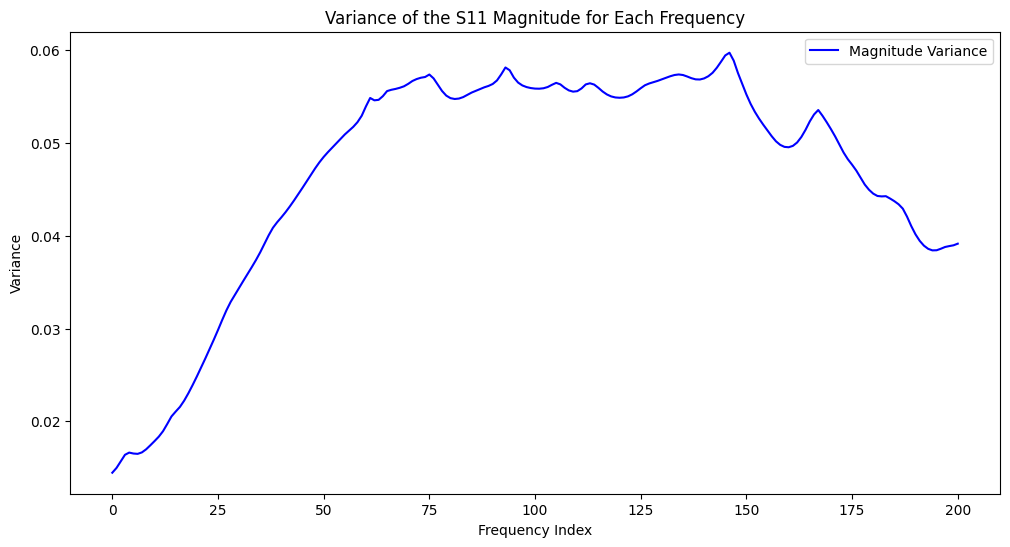

In [14]:
# Plot the magnitude_variance

magnitudes_variance = magnitude_df.var(axis=0)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(s11_magnitude.shape[1]), magnitudes_variance, label='Magnitude Variance', color='blue')
plt.title('Variance of the S11 Magnitude for Each Frequency')
plt.xlabel('Frequency Index')
plt.ylabel('Variance')
plt.legend()

Peaks in Variance: [  4  61  75  93 105 113 134 146 167 183]


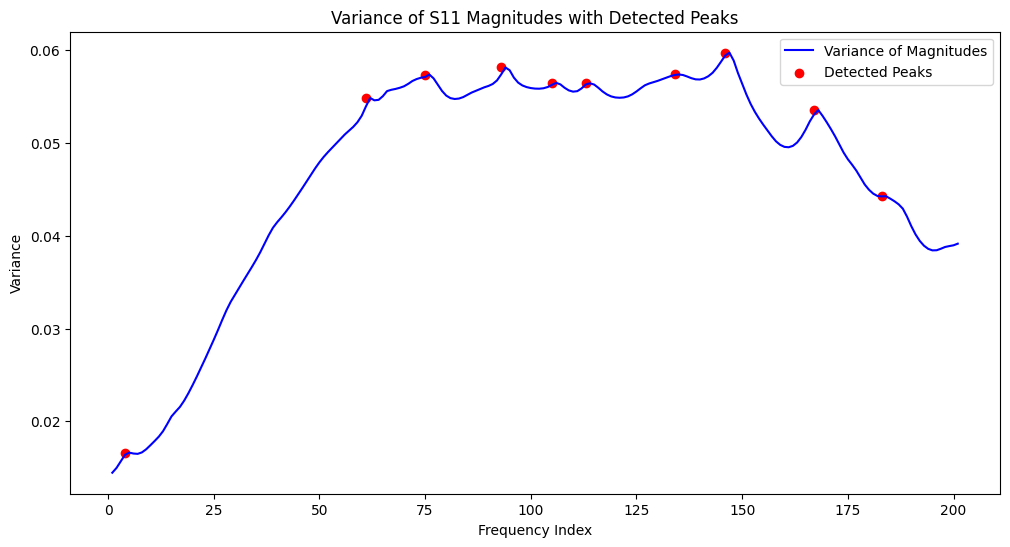

In [15]:
from scipy.signal import find_peaks

# Detect peaks in the variance data
local_peaks, _ = find_peaks(magnitudes_variance)

# Extract the critical frequencies (peaks)
critical_frequencies = local_peaks

# Plot the variance and mark the detected peaks
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 202), magnitudes_variance, label='Variance of Magnitudes', color='blue')
plt.scatter(critical_frequencies, magnitudes_variance[local_peaks], color='red', label='Detected Peaks')
plt.xlabel('Frequency Index')
plt.ylabel('Variance')
plt.title('Variance of S11 Magnitudes with Detected Peaks')
plt.legend()

# Display the list of critical frequencies
print("Peaks in Variance:",critical_frequencies)


From these detected local peaks in the variance, **93**, **146**, and **167** will be chosen as the target frequencies as they display a more significant increase in the variance

In [16]:
df_real_selected_frequency = df_real[["93", "146", "167"]]
df_img_selected_frequency = df_img[["93", "146", "167"]]

df_merged = pd.concat([df_real_selected_frequency, df_img_selected_frequency], axis=1)
df_merged.columns = ["real_93", "real_146", "real_167", "img_93", "img_146", "img_167"]
df_merged

,real_93,real_146,real_167,img_93,img_146,img_167
0,-0.976053,-0.944187,-0.922839,0.044252,0.283490,0.351237
1,0.376827,-0.819371,-0.886550,0.651817,-0.132125,0.211204
2,0.222674,0.904618,0.902026,0.625376,0.164710,-0.138647
3,-0.718520,-0.549938,-0.416342,0.682417,0.814679,0.878852
4,-0.836334,-0.762026,-0.730369,0.527805,0.631348,0.667380
...,...,...,...,...,...,...
380,0.708953,0.417551,0.192468,0.289563,-0.227005,0.222889
381,-0.973032,-0.939352,-0.921348,0.118307,0.310297,0.363072
382,-0.936573,-0.886226,-0.862452,0.321674,0.441946,0.485467
383,0.313846,-0.431563,-0.815625,0.751038,-0.581759,-0.238350


## Linear Regression Model

In [17]:
# Split the data into features and targets

X = df_std_pca
Y = df_merged

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Build the model

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09199926940657044


In [19]:
coefficients_df = pd.DataFrame(model.coef_, columns=explained_var_ratio.index, index=Y.columns)
coefficients_df['Intercept'] = model.intercept_
coefficients_df.T

,real_93,real_146,real_167,img_93,img_146,img_167
PC1,0.340004,0.354763,0.358585,-0.078465,-0.078971,-0.087479
PC2,-0.032429,-0.019996,0.012232,0.048267,0.080228,0.072653
PC3,-0.011834,-0.029430,-0.017358,-0.051000,-0.019444,-0.016948
PC4,0.032446,0.068647,0.052704,0.053857,0.042309,0.033644
Intercept,-0.277933,-0.269058,-0.248729,0.288890,0.351574,0.376633



### Patterns at Individual Frequency Points

- Upon examining `coefficients_df`, it is evident that PC1 has a positive coefficient of approximately 0.35 for the real parts for frequencies 93,146 and 167. This indicates that PC1 is the most important variable for the real targets, as the other PCs have smaller coefficients.
- Additionally, considering the loadings percentage of PC1, it can be deduced that **width of patch**,**height of substrate**, and **dielectric constant of substrate** are the most influential factors, with loadings of **38.9%**, **38.9%**, and **19.8%**, respectively.
- Since the components of these three variables are also **positive**, with values of **0.62**, **0.62**, and **0.45**, it can be inferred that an increase in these variable values leads to an increase in the real part of the S11 values, which also increases the magnitude. This indicates a greater reflection and therefore poorer transmission at the selected frequencies.

### Broader Trends in Design Space

- According to the analysis, the **width of patch**,**height of substrate**, and **dielectric constant of substrate** should be minimized to achieve a low S11 score. Therefore, these factors should be carefully considered when designing an antenna.


# Model Performance and Interpretability

## PCA and Regression Models in Simplifying and Predicting

- PCA reduces the dimensionality of the data by transforming correlated variables into uncorrelated principal components. It captures most of the variance in the original data with fewer dimensions.
- In the context of antenna design, PCA helps to identify the key geometric and material factors (such as patch width, substrate height, and dielectric constant) that influence electromagnetic behavior.
- PCA primarily helps in understanding which variables cause the changes in the data, but not directly contributes to predictive accuracy.
- Linear regression can capture basic linear trends between design factors and performance, therefore it acts as a baseline model for the analysis in antenna design.

## Limitations of these models

  - PCA is limited to linear transformations and does not capture nonlinear interactions between variables. Therefore, it might miss some nonlinear dependencies which can influence antenna performance.
  - Linear regression assumes linear relationships, which restricts its predictive power in complex systems where antenna parameters often interact nonlinearly

## Potential Improvements:
  - Multidimensional Scaling could be used instead of PCA which can capture nonlinear relationships. Thus more complex structures within the data could be captured.
  - Incorporating nonlinear models, such as polynomial regression or gradient boosting machines could better capture the complex dependencies and improve accuracy.

  - Integrating more domain knowledge from electromagnetic theory could improve model accuracy by guiding feature selection and transformation.


# Citations

OpenAI. *ChatGPT*, Version 4, OpenAI, 2024. www.openai.com.